In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Examples for how to use functions from BioPlexPy

Import functions from module

In [2]:
from BioPlexPy.helper_funcs import getBioPlex
from BioPlexPy.helper_funcs import getGSE122425
from BioPlexPy.helper_funcs import bioplex2graph
from BioPlexPy.helper_funcs import getCorum
from BioPlexPy.helper_funcs import display_PPI_network_for_complex

/home/rv76/anaconda2/envs/CCB_BioPlexPy/lib/python3.7/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


## [1] *getBioPlex* - function to retrieve interactions data

### Description

Load BioPlex interactions data - This function loads BioPlex PPI data for cell lines HEK293T and HCT116, note we only have version 1.0 for HCT116 cells.

### Parameters

1. cell_line : str
 - Takes input: '293T' or 'HCT116'
 
 
2. version : str
 - Takes input: '3.0', '1.0' or '2.0'

### Returns

Pandas DataFrame
 - A dataframe with each row corresponding to a PPI interaction.

<ins>Column Descriptions</ins>

GeneA: Entrez Gene ID for the first interacting protein

GeneB: Entrez Gene ID for the second interacting protein

UniprotA: Uniprot ID for the first interacting protein

UniprotB: Uniprot ID for the second interacting protein

SymbolA: Symbol for the first interacting protein

SymbolB: Symbol for the second interacting protein

p(Wrong ID): Probability of wrong protein ID (CompPASS-Plus)

p(NotInteractor): Probability of nonspecific background (CompPASS-Plus)

p(Interactor): Probability of high-confidence interaction (CompPASS-Plus)

### Example 1

Load DataFrames that contain protein-protein interactions from **HEK293T** & **HCT116** cell lines

[Huttlin, E. L., Bruckner, R. J., Navarrete-Perea, J., Cannon, J. R., Baltier, K., Gebreab, F., ... & Gygi, S. P. (2021). Dual proteome-scale networks reveal cell-specific remodeling of the human interactome. Cell, 184(11), 3022-3040.](https://www.sciencedirect.com/science/article/abs/pii/S0092867421004463)

In [3]:
bp_293t = getBioPlex('293T', '3.0')

In [4]:
bp_293t.head()

,GeneA,GeneB,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
0,100,728378,P00813,A5A3E0,ADA,POTEF,6.881844e-10,0.000118,0.999882
1,222389,6137,Q8N7W2-2,P26373,BEND7,RPL13,1.340380e-18,0.225664,0.774336
2,222389,5928,Q8N7W2-2,Q09028-3,BEND7,RBBP4,7.221401e-21,0.000064,0.999936
3,222389,25873,Q8N7W2-2,Q9Y3U8,BEND7,RPL36,7.058372e-17,0.128183,0.871817
4,222389,6124,Q8N7W2-2,P36578,BEND7,RPL4,1.632313e-22,0.200638,0.799362


### Example 2

In [5]:
bp_hct116 = getBioPlex('HCT116', '1.0')

In [6]:
bp_hct116.head()

,GeneA,GeneB,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
0,88455,50649,Q8IZ07,Q9NR80-4,ANKRD13A,ARHGEF4,3.959215e-04,0.000033,0.999571
1,88455,115106,Q8IZ07,Q96CS2,ANKRD13A,HAUS1,4.488473e-02,0.001935,0.953181
2,88455,23086,Q8IZ07,Q8NEV8-2,ANKRD13A,EXPH5,7.402394e-05,0.000930,0.998996
3,88455,54930,Q8IZ07,Q9H6D7,ANKRD13A,HAUS4,9.180959e-07,0.000128,0.999871
4,88455,79441,Q8IZ07,Q68CZ6,ANKRD13A,HAUS3,8.709394e-07,0.001495,0.998504


## [2] *getGSE122425* - function to retrieve HEK293 RNAseq expression data

### Description

Retrieve HEK293 RNAseq expression data.

### Returns

adata : AnnData object
 - SummarizedExperiment of HEK293 raw count with an added layer storing rpkm.

### Example 1

Load AnnData structure that has mRNA profiles (RNA-seq) of wild type (WT) and NSUN2-/- HEK293 cells that were generated by deep sequencing, in triplicate.

[Effects of NSUN2 deficiency on the mRNA 5-methylcytosine modification and gene expression profile in HEK293 cells (RNA-Seq)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE122425)

In [7]:
HEK293_adata = getGSE122425()

In [8]:
HEK293_adata

AnnData object with n_obs × n_vars = 57905 × 6 
    obs: 'SYMBOL', 'KO', 'GO', 'length'
    layers: 'rpkm'

List rows (observations) that specify **genes**

In [9]:
print(HEK293_adata.obs_names[:10].tolist())

['ENSG00000223972', 'ENSG00000227232', 'ENSG00000243485', 'ENSG00000237613', 'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092', 'ENSG00000238009', 'ENSG00000239945', 'ENSG00000233750']


List columns (variables) that specify whether at **knock-out or wildtype replicates**

In [10]:
print(HEK293_adata.var_names.tolist())

['NK.1', 'NK.2', 'NK.3', 'WT.1', 'WT.2', 'WT.3']


Call matrix with **raw counts**

In [11]:
print(HEK293_adata.X)

[[   0    0    2    1    2    2]
 [ 705  812 1121  732  690  804]
 [   0    0    0    0    0    2]
 ...
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]


Call matrix with **rpkm**

In [12]:
print(HEK293_adata.layers["rpkm"])

[[0.   0.   0.01 0.01 0.01 0.01]
 [4.77 5.21 6.8  5.43 5.07 5.39]
 [0.   0.   0.   0.   0.   0.04]
 ...
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]


## [3] *bioplex2graph* - function to convert BioPlex PPIs into a graph data structure

### Description

Convert BioPlex PPIs into a graph - This function converts representation of BioPlex PPIs into a graph data structure representation of BioPlex PPIs in a NetworkX object from NetworkX.

### Parameters

1. DataFrame of PPIs : Pandas DataFrame

### Returns

NetworkX graph
 - A NetworkX graph with Nodes = Uniprot Gene Symbols and Edges = interactions.

### Example 1

1. Obtain the latest version of the 293T PPI network

In [13]:
bp_293t_df = getBioPlex('293T', '3.0')

In [14]:
bp_293t_df.head()

,GeneA,GeneB,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
0,100,728378,P00813,A5A3E0,ADA,POTEF,6.881844e-10,0.000118,0.999882
1,222389,6137,Q8N7W2-2,P26373,BEND7,RPL13,1.340380e-18,0.225664,0.774336
2,222389,5928,Q8N7W2-2,Q09028-3,BEND7,RBBP4,7.221401e-21,0.000064,0.999936
3,222389,25873,Q8N7W2-2,Q9Y3U8,BEND7,RPL36,7.058372e-17,0.128183,0.871817
4,222389,6124,Q8N7W2-2,P36578,BEND7,RPL4,1.632313e-22,0.200638,0.799362


2. Turn the data into a graph with NetworkX

In [15]:
bp_293t_G = bioplex2graph(bp_293t_df)

Analyze nodes in PPI network

In [16]:
len(bp_293t_G.nodes()) # number of nodes

13689

In [17]:
list(bp_293t_G.nodes())[0:5]

['P00813', 'A5A3E0', 'Q8N7W2', 'P26373', 'Q09028']

Call nodes and attributes stored for each node

In [18]:
bp_293t_G.nodes['P00813']

{'entrezid': 100, 'symbol': 'ADA', 'isoform': 'P00813'}

In [19]:
bp_293t_G.nodes['Q8N7W2']

{'entrezid': 222389, 'symbol': 'BEND7', 'isoform': 'Q8N7W2-2'}

Analyze edges in PPI network

In [20]:
len(bp_293t_G.edges()) # number of edges

115868

In [21]:
list(bp_293t_G.edges())[0:5]

[('P00813', 'A5A3E0'),
 ('Q8N7W2', 'P26373'),
 ('Q8N7W2', 'Q09028'),
 ('Q8N7W2', 'Q9Y3U8'),
 ('Q8N7W2', 'P36578')]

Call edges and attributes stored for each edge (PPI)

In [22]:
bp_293t_G.get_edge_data('P00813', 'A5A3E0')

{'pW': 6.881843799526549e-10,
 'pNI': 0.000117635665707004,
 'pInt': 0.9998823636461089}

### Example 2 - Run network algorithms using NetworkX

In [23]:
import networkx as nx
import pandas as pd

Run [pagerank algorithm](https://networkx.guide/algorithms/link-analysis/pagerank/) on network and rank nodes

In [27]:
bp_293t_G_pr = nx.pagerank(bp_293t_G, alpha=0.8)
bp_293t_G_pr = pd.Series(bp_293t_G_pr)
bp_293t_G_pr.sort_values(ascending = False, inplace = True)

In [29]:
bp_293t_G_pr.head(n=5)

P11142    0.002610
P11021    0.002168
Q04917    0.001840
O14556    0.001527
P0CG47    0.001471
dtype: float64

## [4] *getCorum* - function to retrieve CORUM complex data

### Description

Functionality for retrieving the CORUM protein complex data.

### Parameters

1. complex_set : str
 - Takes input 'all' (default), 'core' or 'splice'
 
 
2. organism : str
 - Takes input 'Bovine', 'Dog', 'Hamster', 'Human' (default), 'MINK', 'Mammalia', 'Mouse', 'Pig', 'Rabbit' or 'Rat'

### Returns

Pandas DataFrame
 - A dataframe with each row corresponding to a CORUM complex.

### Example 1

Retrieve **all** CORUM complexes for **Human** 

In [30]:
all_Human_CORUM_df = getCorum()

In [31]:
all_Human_CORUM_df.head(n=3)

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name),Subunits comment,PubMed ID,Complex comment,Disease comment,SWISSPROT organism,subunits(Gene name syn),subunits(Protein name)
0,1,BCL6-HDAC4 complex,Human,None,None,P41182;P56524,604;9759,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC4,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0288,B-cell lymphoma 6 protein;Histone deacetylase 4
1,2,BCL6-HDAC5 complex,Human,None,None,P41182;Q9UQL6,604;10014,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC5,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0600,B-cell lymphoma 6 protein;Histone deacetylase 5
2,3,BCL6-HDAC7 complex,Human,None,None,P41182;Q8WUI4,604;51564,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC7,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;HDAC7A,B-cell lymphoma 6 protein;Histone deacetylase 7


In [33]:
all_Human_CORUM_df.shape

(2916, 20)

### Example 2

Retrieve the **core** CORUM complexes for **Mouse** 

In [34]:
core_Mouse_CORUM_df = getCorum('core','Mouse')

In [35]:
core_Mouse_CORUM_df.head(n=3)

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
0,9,6S-nuclear aryl hydrocarbon (Ah) receptor liga...,Mouse,None,None,P30561;P53762,11622;11863,MI:0019- coimmunoprecipitation,GO:2001141;GO:0006355;GO:0003677;GO:0023052;GO...,regulation of RNA biosynthetic process;regulat...,11.02.03.04;16.03.01;30.01;34.11.03;70.10,transcriptional control;DNA binding;cellular s...,;None,"Arnt contains a basic helix-loop-helix motif, ...",None,Mus musculus (Mouse);Mus musculus (Mouse),None,Ahr;Arnt,1317062,Aryl hydrocarbon receptor ;Aryl hydrocarbon re...
1,25,9S-cytosolic aryl hydrocarbon (Ah) receptor no...,Mouse,None,None,O08915;P07901;P11499;P30561,11632;15519;15516;11622,MI:0019- coimmunoprecipitation; MI:0030- cross...,GO:0006950;GO:0009593;GO:0042221;GO:0005737,response to stress;detection of chemical stimu...,32.01;34.11.03;70.03,stress response;chemoperception and response;c...,;Hsp86 Hsp86-1 Hspca;Hsp84 Hsp84-1 Hspcb;,The authors propose that the AhR exists in cyt...,None,Mus musculus (Mouse);Mus musculus (Mouse);Mus ...,None,Aip;Hsp90aa1;Hsp90ab1;Ahr,1310021,AH receptor-interacting protein ;Heat shock pr...
2,39,Immunoproteasome,Mouse,20S immunoproteasome; proteasome,None,O09061;O35955;O70435;P28063;P28076;P49722;P990...,19170;19171;19167;16913;16912;19166;19172;2644...,MI:0019-coimmunoprecipitation,GO:0016485;GO:0043161;GO:0006511;GO:0006950;GO...,protein processing;proteasome-mediated ubiquit...,14.07.11;14.13.01.01;32.01;36.25.16.03.05;70.0...,protein processing (proteolytic);proteasomal d...,None;Lmp10 Mecl1;None;Lmp7 Mc13;Lmp2 Ring12;Lm...,The proteasome is an essential component of th...,None,Mus musculus (Mouse);Mus musculus (Mouse);Mus ...,None,Psmb1;Psmb10;Psma3;Psmb8;Psmb9;Psma2;Psmb4;Psm...,10436176,Proteasome subunit beta type-1;Proteasome subu...


In [36]:
core_Mouse_CORUM_df.shape

(540, 20)

## [5] *display_PPI_network_for_complex* - function to visualize PPI data for a given complex from CORUM

### Description

Display network of BioPlex PPIs for a CORUM complex - This function displays a complete network in which nodes represent the proteins in a specified CORUM complex and edges represent BioPlex PPIs using NetworkX. Edges detected through AP-MS are colored darker.

See [Huttlin, E. L., Bruckner, R. J., Navarrete-Perea, J., Cannon, J. R., Baltier, K., Gebreab, F., ... & Gygi, S. P. (2021). Dual proteome-scale networks reveal cell-specific remodeling of the human interactome. Cell, 184(11), 3022-3040.](https://www.sciencedirect.com/science/article/abs/pii/S0092867421004463) for reference.

### Parameters

1. DataFrame of PPIs : Pandas DataFrame
    

2. DataFrame of CORUM complexes : Pandas DataFrame


3. Name of Corum Complex: str


4. Size of Nodes in Network: int


5. Width of Edges in Network: float


6. Path to save figure: str

### Returns

PNG file
 - Displays and outputs a PNG file of network.

### Example 1

1. Obtain the latest version of the 293T PPI network

In [37]:
bp_PPI_df = getBioPlex('293T', '3.0')

2. Obtain **core** CORUM complexes for **Human**

In [38]:
Corum_DF = getCorum('core', 'Human')

3.  Visualize network for specified protein complex using PPI data

**ING2** complex as an example

/home/rv76/anaconda2/envs/CCB_BioPlexPy/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/rv76/anaconda2/envs/CCB_BioPlexPy/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


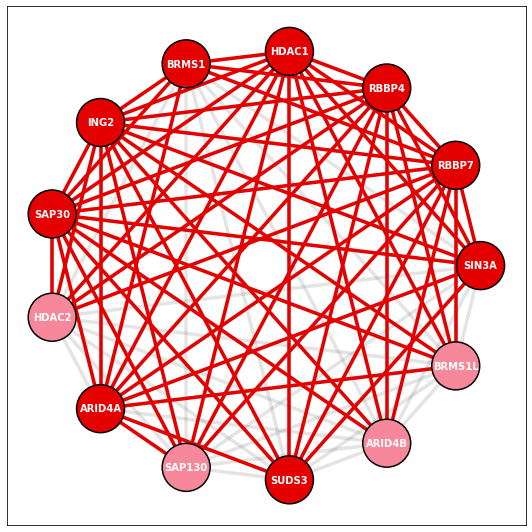

In [39]:
display_PPI_network_for_complex(bp_PPI_df, Corum_DF, 'ING2 complex', 2300, 3.5, '/n/shared_db/ccb/bioplex/BioPlexPy_testing/figures/network_293T_3.0_ING2-complex.png')

### Example 2

**Arp2/3** complex as an example

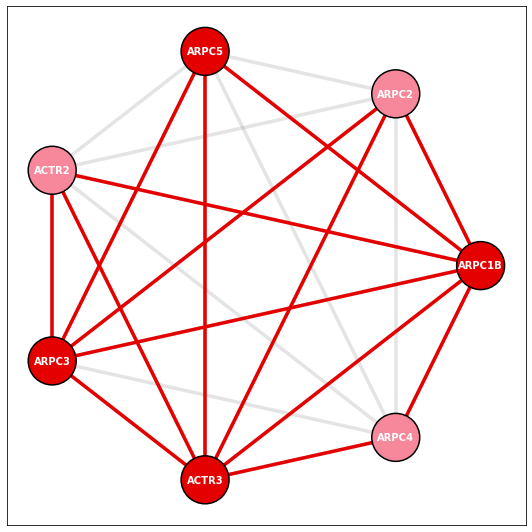

In [40]:
display_PPI_network_for_complex(bp_PPI_df, Corum_DF, 'Arp2/3 protein complex', 2300, 3.5, '/n/shared_db/ccb/bioplex/BioPlexPy_testing/figures/network_293T_3.0_Arp2-3-complex.png')